# Defining a simple augmentation pipeline for image augmentation

This example shows how you can use Albumentations to define a simple augmentation pipeline.

### Import the required libraries

In [ ]:
import albumentations as A
import cv2
from matplotlib import pyplot as plt

### Define the visualization function

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)

### Read the image from the disk and convert it from the BGR color space to the RGB color space

[For historical reasons](https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/), OpenCV reads an image in BGR format (so color channels of the image have the following order: Blue, Green, Red). Albumentations uses the most common and popular RGB image format. So when using OpenCV, we need to convert the image format to RGB explicitly.

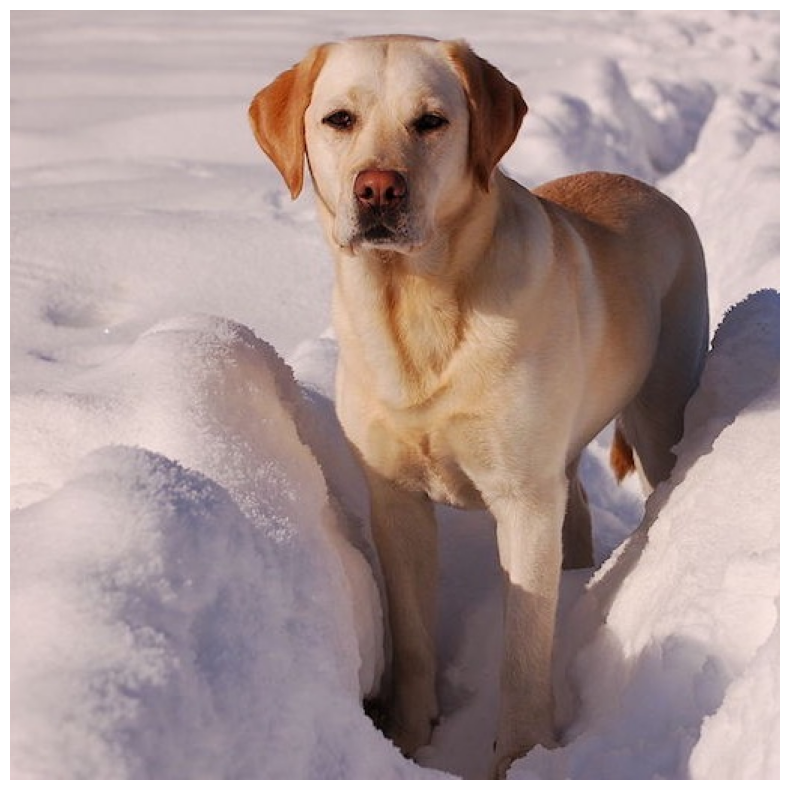

In [ ]:
image = cv2.imread("images/image_3.jpg", cv2.IMREAD_COLOR_RGB)
visualize(image)

### Define a single augmentation, pass the image to it and receive the augmented image

We fix the random seed for visualization purposes, so the augmentation will always produce the same result. In a real computer vision pipeline, you shouldn't fix the random seed before applying a transform to the image because, in that case, the pipeline will always output the same image. The purpose of image augmentation is to use different transformations each time.

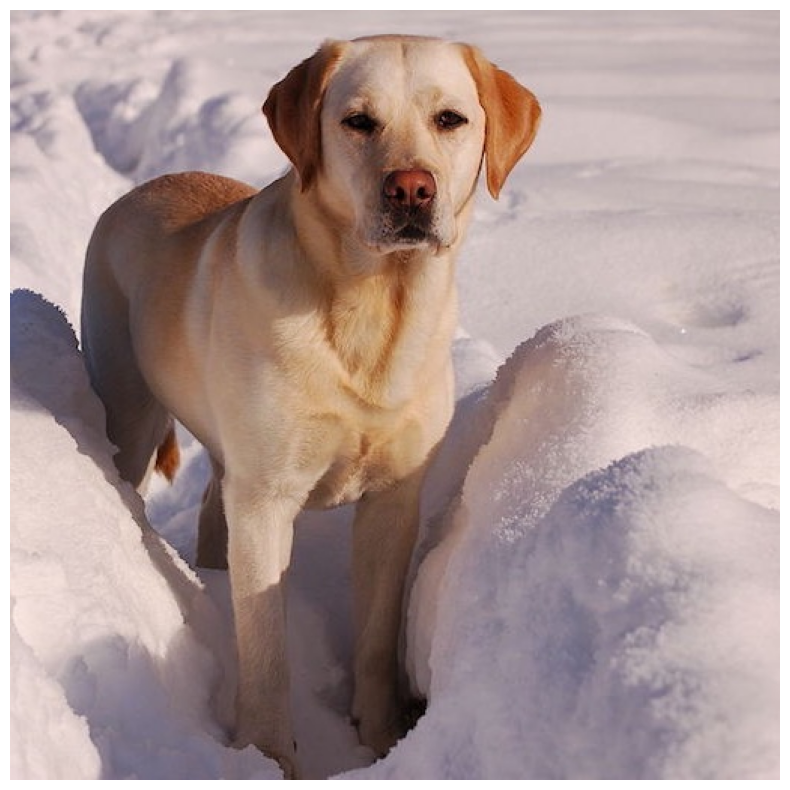

In [ ]:
transform = A.HorizontalFlip(p=0.5)
transform.set_random_seed(137)

augmented_image = transform(image=image)["image"]
visualize(augmented_image)

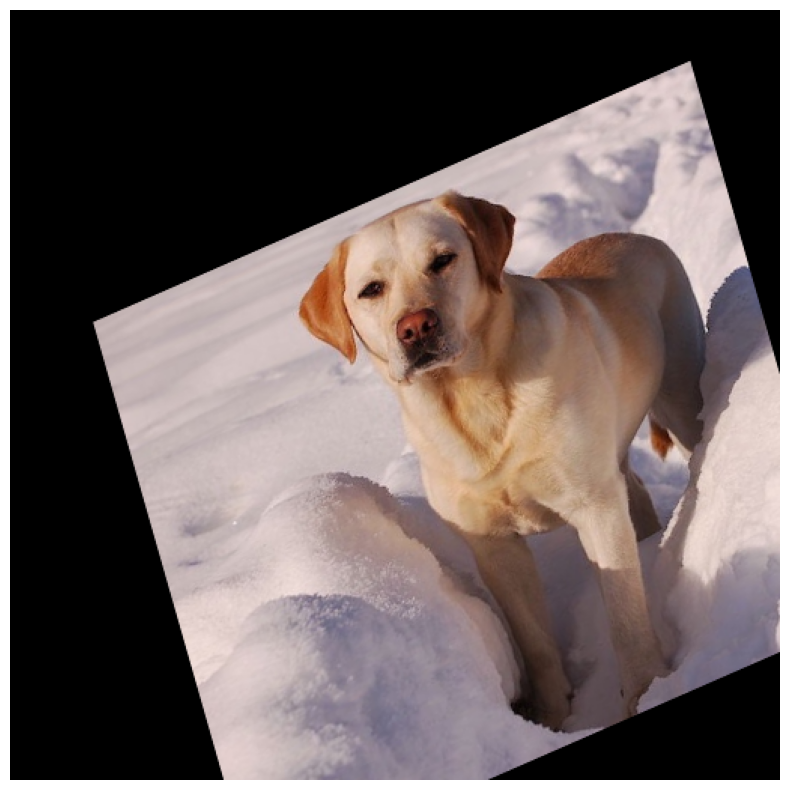

In [ ]:
transform = A.Affine(p=0.5, scale=0.8, shear=5, translate_percent=0.1, rotate=20)
transform.set_random_seed(137)
augmented_image = transform(image=image)["image"]
visualize(augmented_image)

### Define an augmentation pipeline using `Compose`, pass the image to it and receive the augmented image

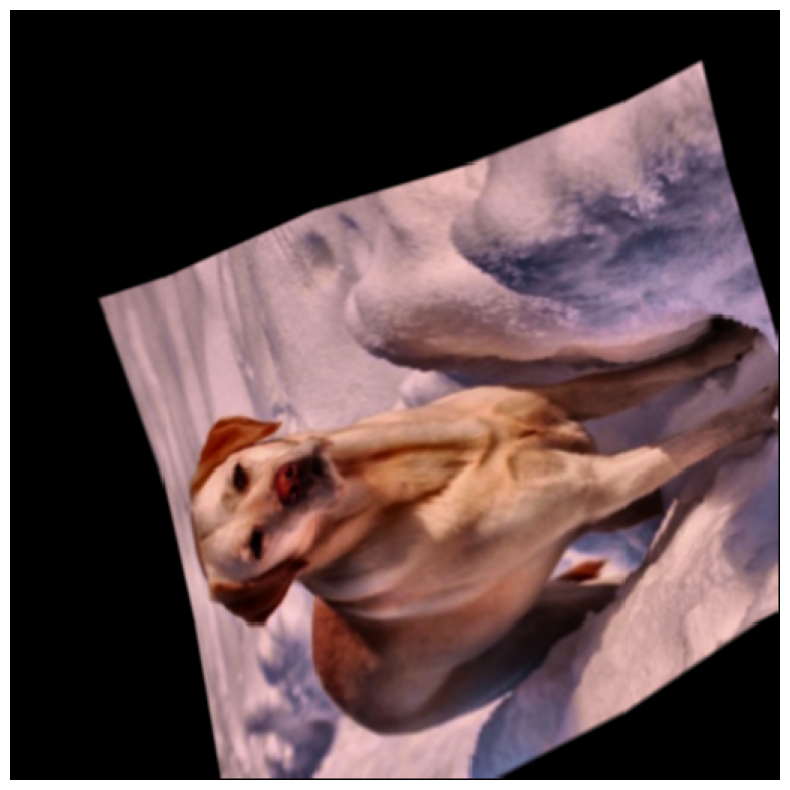

In [ ]:
transform = A.Compose(
    [
        A.CLAHE(),
        A.RandomRotate90(),
        A.Transpose(),
        A.Affine(rotate=20, scale=0.8, shear=5, translate_percent=0.1, p=1),
        A.Blur(blur_limit=3),
        A.OpticalDistortion(),
        A.GridDistortion(),
        A.HueSaturationValue(),
    ],
    strict=True,
    seed=137,
)

augmented_image = transform(image=image)["image"]
visualize(augmented_image)

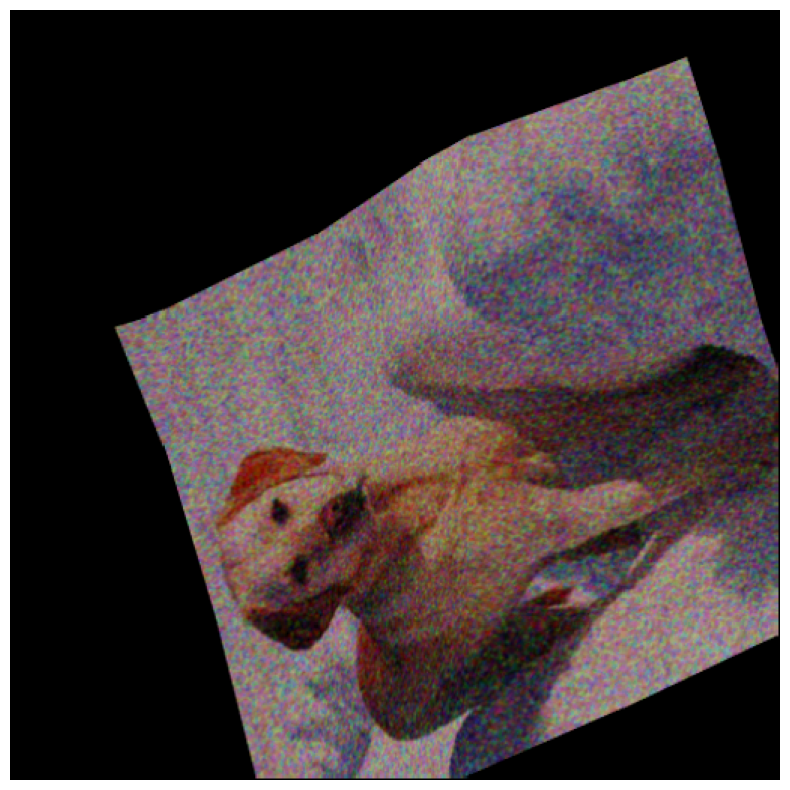

In [ ]:
transform = A.Compose(
    [
        A.RandomRotate90(),
        A.Transpose(),
        A.GaussNoise(),
        A.OneOf(
            [
                A.MotionBlur(p=0.2),
                A.MedianBlur(blur_limit=3, p=0.1),
                A.Blur(blur_limit=3, p=0.1),
            ],
            p=0.2,
        ),
        A.Affine(rotate=20, scale=0.8, shear=5, translate_percent=0.1, p=0.2),
        A.OneOf(
            [
                A.OpticalDistortion(p=0.3),
                A.GridDistortion(p=0.1),
            ],
            p=0.2,
        ),
        A.OneOf(
            [
                A.CLAHE(clip_limit=2),
                A.RandomBrightnessContrast(),
            ],
            p=0.3,
        ),
        A.HueSaturationValue(p=0.3),
    ],
    strict=True,
    seed=137,
)

augmented_image = transform(image=image)["image"]
visualize(augmented_image)